##### Copyright 2020 The TensorFlow IO Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 色空間変換

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/io/tutorials/colorspace"><img src="https://www.tensorflow.org/images/tf_logo_32px.png"> TensorFlow.orgで表示</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/io/tutorials/colorspace.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png"> Google Colab で実行</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ja/io/tutorials/colorspace.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub でソースを表示{</a></td>
      <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ja/io/tutorials/colorspace.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">ノートブックをダウンロード/a0}</a></td>
</table>

## 概要

コンピュータビジョンでは、選択した色空間がモデルの性能を大きく左右することがあります。最も一般的な色空間は`RGB`ですが、多くの場合は`YUV`、`YCbCr`、`XYZ (CIE)`などの他の色空間に切り替えると、モデルの性能が向上します。

`tensorflow-io`パッケージは、画像データの準備や拡張に使用できる色空間変換 API のリストを提供しています。

## セットアップ

### 必要なパッケージをインストールし、ランタイムを再起動する

In [2]:
!pip install -q tensorflow-io

### サンプル画像をダウンロードする

このチュートリアルで使用する画像例は[雪の中の猫](https://commons.wikimedia.org/wiki/File:Felis_catus-cat_on_snow.jpg)ですが、任意の JPEG 画像で置き換えても構いません。

以下のように画像をダウンロードし、`sample.jpg`としてローカルディスクに保存します。

In [3]:
!curl -o sample.jpg -L https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg

!ls -ls sample.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100 17858  100 17858    0     0  93497      0 --:--:-- --:--:-- --:--:-- 93497


20 -rw-rw-r-- 1 kbuilder kokoro 17858 Feb 13 02:54 sample.jpg


## 使い方

### 画像ファイルを読み込む

画像を読み取り、形状が`(213, 320, 3)`の`uint8`テンソルにデコードします。

In [4]:
import tensorflow as tf
import tensorflow_io as tfio

image = tf.image.decode_jpeg(tf.io.read_file('sample.jpg'))

print(image.shape, image.dtype)

(213, 320, 3) <dtype: 'uint8'>


画像は以下の方法で表示できます。

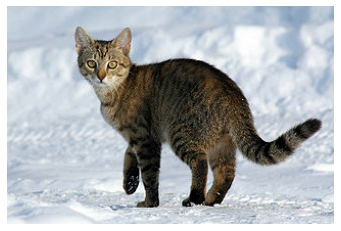

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show()

### RGB からグレースケールに変換する

`tfio.experimental.color.rgb_to_grayscale`を使用して`RGB`画像を`Grayscale`に変換し、チャンネル数を 3 から 1 に減らすことができます。

(213, 320, 1) <dtype: 'uint8'>


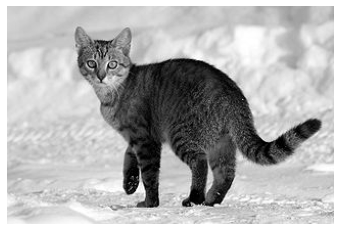

In [6]:
grayscale = tfio.experimental.color.rgb_to_grayscale(image)

print(grayscale.shape, grayscale.dtype)

# use tf.squeeze to remove last channel for plt.imshow to display:
plt.figure()
plt.imshow(tf.squeeze(grayscale, axis=-1), cmap='gray')
plt.axis('off')
plt.show()

### RGB から BGR に変換する

画像ソフトやカメラのメーカーによっては`BGR`を好む場合がありますが、`tfio.experimental.color.rgb_to_bgr`を使用して BGR に変換することができます。

(213, 320, 3) <dtype: 'uint8'>


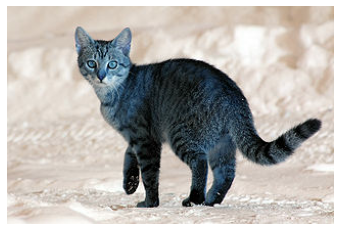

In [7]:
bgr = tfio.experimental.color.rgb_to_bgr(image)

print(bgr.shape, bgr.dtype)

plt.figure()
plt.imshow(bgr)
plt.axis('off')
plt.show()

### RGB から CIE XYZ に変換する

`CIE XYZ`（または `CIE 1931 XYZ`）は、多くの画像処理プログラムで使用されている一般的な色空間です。以下では`tfio.experimental.color.rgb_to__xyz`を使用して、RGB から`CIE XYZ`に変換しています。`tfio.experimental.color.rgb_to_xyz`は`[0, 1]`の範囲の浮動小数点入力を想定しているため、追加の前処理が必要なので注意してください。

(213, 320, 3) <dtype: 'uint8'>


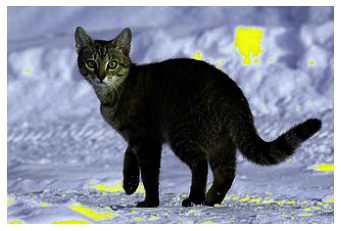

In [8]:
# convert to float32
image_float32 = tf.cast(image, tf.float32) / 255.0

xyz_float32 = tfio.experimental.color.rgb_to_xyz(image_float32)

# convert back uint8
xyz = tf.cast(xyz_float32 * 255.0, tf.uint8)

print(xyz.shape, xyz.dtype)

plt.figure()
plt.imshow(xyz)
plt.axis('off')
plt.show()

### RGB から YCbCr に変換する

最後に、多くのビデオシステムでは`YCbCr`がデフォルトの色空間です。`YCbCr`への変換は、`tfio.experimental.color.rgb_to_ycbcr`を使用して行います。

(213, 320, 3) <dtype: 'uint8'>


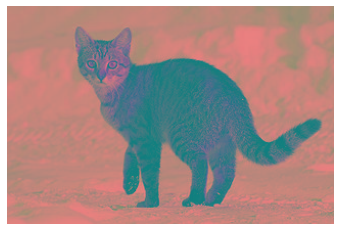

In [9]:
ycbcr = tfio.experimental.color.rgb_to_ycbcr(image)

print(ycbcr.shape, ycbcr.dtype)

plt.figure()
plt.imshow(ycbcr, cmap='gray')
plt.axis('off')
plt.show()

さらに面白いことに、`YCbCr`は各成分が知覚的に意味のある情報を持つ`Y'`（ルマ）、`Cb`（青色差クロマ）、`Cr`（赤色差クロマ）という成分に分解することができます。

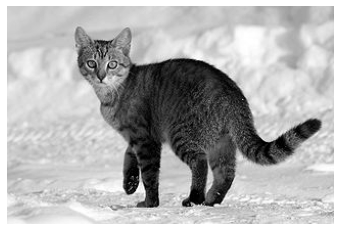

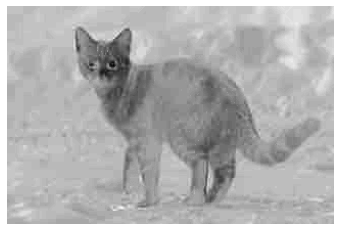

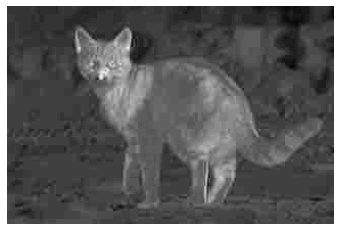

In [10]:
y, cb, cr = ycbcr[:,:,0], ycbcr[:,:,1], ycbcr[:,:,2]

# Y' component
plt.figure()
plt.imshow(y, cmap='gray')
plt.axis('off')
plt.show()

# Cb component
plt.figure()
plt.imshow(cb, cmap='gray')
plt.axis('off')
plt.show()

# Cr component
plt.figure()
plt.imshow(cr, cmap='gray')
plt.axis('off')
plt.show()